# Reinforcement Learning
## Project: Train a Smartcab to Drive

## Author: Sagarnil Das



-----

## Getting Started
In this project, we will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, we will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  


**Answer:** 

 - No, the Smartcab does not move at all during the simulation as it has not been instructed to take any actions yet to reach a new state.
 - The driver is receiving two kinds of rewards: One is positive and the other is negative.
 - When the signal turns red, the driver receives positive rewards as it is following traffic rule at that time. But when the signal turns green, it still stays stationary and receives negative rewards. This is because we still haven't changed any codes yet to move the cab.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 

 - In the agent.py file, I chose these 3 flags:
  - ** learning **: If this is set to true, the driving agent will be forced to use Q-learning.
  - ** enforce_deadline **: If this is set to true, it will enforce a deadline metric on the driving agent.
  - ** verbose **: If set to true, it will display additional output from the simulation.
  
 
 - In the environment.py file, the act() class function is called when an agent performs an action. It considers an action and performs the action if it is legal. It receives a reward for the agent based on traffic laws.
 
 
 - In the simulator.py file, the difference between the render_text() function and the render() function is render_text() renders textual display of the simulation whereas render() function generates a GUI simulation of the Smartcab and all the other elements in a visual display format. Both are supplementary to each other.
 
 
 - In the planner.py file, the next_waypoint() function considers East-West direction first and then the North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For our first implementation, we will navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that we have access to several class variables that will help us write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, we will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, we may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that we understand what each flag does and how it affects the simulation!

Once we have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


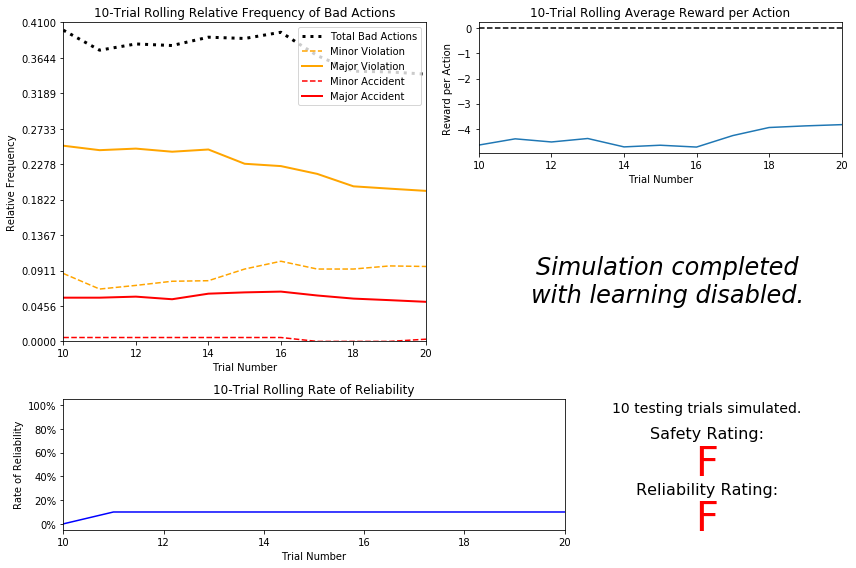

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

 - The driver at its present state makes very frequent bad decisions. This is evident as right now the driver is just driving randomly. Initially, the driver made bad decisions **41%** of the time resulting in major accidents around **5%** of the time. With the increase in number of trials, we see that the percentage of bad decisions decreases to around **34%** resulting in *major accidents* around **4.5%** of the time.
 
 
 - In the current situation, we see that the rate of reliability slowly increases with number of trials and becomes constant at around **10%**. This implies that **90%** of the time, the driver does not reach its destination on time. Given the fact that in its present state, the driving agent is driving randomly without any learning, this reliability totally makes sense.
 
 
 - We see based on this first set of simulations, the total rewards for the driver on an average with the increase of trial numbers stay at the negative scale **(range of -3.5 to -5)**. This implies that the driver has been heavily penalized for taking bad decisions througout the whole simulation resulting in few major accidents.
 
 
 - As the number of trials increases, we see that the total percentage of bad decisions decrease from around **41% to 34%** which also decreases the number of major accidents with increase in number of trials. But it doesn't decrease so much so as to get anything else than a safety rating of 'F'. For the reliability, it increases upto 11 trials but then stays constant at about 10% which implies that 90% of the time, the driver does not reach the destination on time. So here also, very naturally, the driver receives a reliability rating of 'F'. So we see for now, both safety and reliability does not change significantly with the increase in number of trials.
 
 
 - At this point of time, the Smartcab is neither safe nor reliable for the passengers as its actions are totally random resulting in both major and minor accidents. Also **26%** of the time, it is commiting a major traffic violation and around 11% of the time a minor traffic violation even at the end of 20 trials. It's also late 90% of the time. So it's not reliable either.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** 

In my opinion, the features which are most relevant for the agent to learn both safety and accuracy are as follows:

** 1. Feature selection:**

 - ** inputs: light ** - The smartcab must know the difference between *green signal* and *red signal*. It should not idle when the signal is green resulting is negative rewards. Also, it should not cut the traffic or jump a red signal as this is a **major traffic violation** which can result to **major accidents** also.
 
 
 - ** waypoint ** - The heading of the Smartcab must be known by the agent so that it can head towards the correct direction to reach its *intended destination*.
 
 
 - ** inputs: oncoming **- The Smartcab must know whether there is a **oncoming traffic** when it's trying to make a left turn so as to it can prevent itself from going if there's indeed an oncoming traffic. This can lead to a **minor traffic violation** or a **major accident** if there's a vehicle present.
 
 
 - ** inputs: left ** - This parameter indicates if there's a vehicle to the Smartcab's left and if a vehicle is present, what is its intended direction of travel, i.e. None, Forward, Left or Right. So let's consider a few scenarios here. Suppose there is a vehicle present to the left of the Smartcab and the Signal is Red. In this case, our Smartcab can take a right turn, if there's no vehicle present from the traffic on the left and the Smartcab's intention is not to go forward. But if there's a traffic from the left moving forward, then going right will cause a **major accident**.
 
 
** 2. Non-relevant Features:**

 - ** inputs: right ** - This parameter indicates if there's a traffic from the Smartcab's right. In my opinion, this feature does not carry much *weigtage*. Let's consider a few scenarios here. Suppose there are vehicles to the smarcab's right and the signal is red. So it really doesn't matter whether because the Smartcab will not go forward and if it wants to turn right, it will take the lanes which does not contradict the lanes which are taken by the vehicles on right. On the other hand, if the signal is green, the Smartcab again faces no problem turning right and even if it goes Forward, it has the *'right of way'* according to **US traffic rules** in case there's a vehicle on the right trying to go right and in turn causing an accident.
 
 
 - ** Deadline ** - This parameter indicates the number of actions remaining for the Smartcab to reach the destination before running out of time. In my opinion, the absence of knowledge about this parameter can be a *good learning example* for the smartcab from the rewards it receives as it build up the **Q-table**. Setting it this way may help improve on its **reliability** by causing **minor safety violations** to **major accidents**. Performing it this way significantly reduces the size of the Q-table and makes the learning algorithm much more efficient.
 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if we expect the driving agent to learn a **policy** for each state, we would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

For the features that I selected in the last question, let us now calculate the total size of the state space.

1. inputs: light {red, green} - 2 states

2. waypoint {forward, Left, Right} - 3 states
 
3. inputs: oncoming {None, Forward, Left, Right} - 4 states

4. inputs: left {None, Forward, Left, Right} - 4 states

Combining all the fetaures, we get a total of 2 x 3 x 4 x 4 = **96 states**

But now the smartcab also has 4 possible actions: {None, Forward, Left, Right}.

So the total size of the state space = 96 x 4 = **384 possible combinations.**

This is not a very large number. So I believe the learning agent could learn a policy for each of these states within a reasonable number of training trials.

### Update the Driving Agent State
For our second implementation, navigate to the `'build_state()'` agent function. With the justification we've provided in **Question 4**, we will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. We will confirm that our driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, we will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that we are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, we will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, we will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If we have difficulty getting your implementation to work, we can try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that we understand what each flag does and how it affects the simulation! 

Once we have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

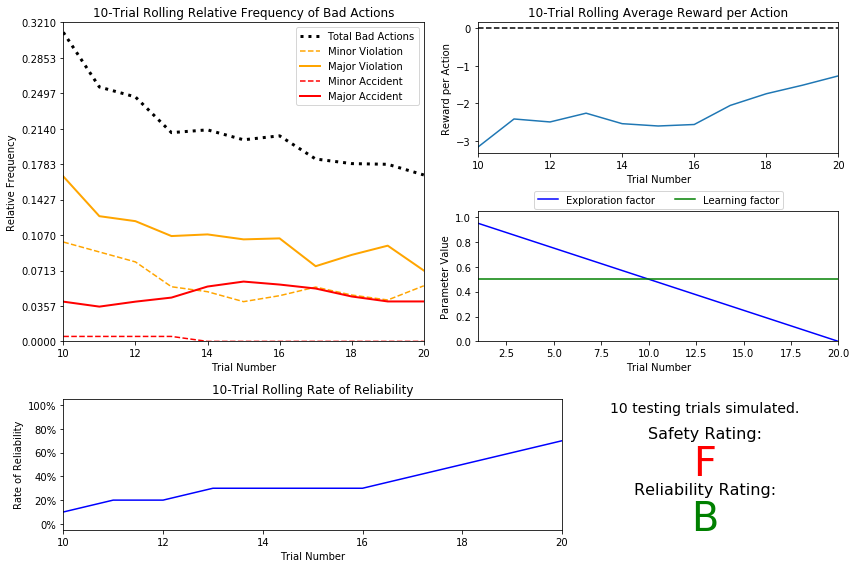

In [11]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

 - Now that we have implemented a Q-learning agent, we see that all the metrics are remarkably different from that of the basic driving agent. The percentage of **bad actions** remarkably **went down** along with **major violation, minor violation and minor accidents**. There are still some major accidents. But it's definitely **improved** than the basic driving agent where every action was taken randomly. Apart from this the reliability made a huge jump **from 10% to around 70%** which is a huge improvement resulting in a reliability rating of **'B'**.The number of **positive rewards** over each training set also increased quite a lot. The total reward for each set is still negative, but there is a significant improvement.
 
 
 - The driving agent required **20 training trials** before it started testing. This number makes sense given the fact we made the epsilon tolerance 0.05. So 1-(20 x 0.05) = 0 which is less than 0.05.
 
 
 - The *decaying function* I implemented for ϵ (exploration factor) is accurately represented in the parameters panel.
 
 
 - With the increase in number of trials, the number of bad actions **decreased significantly**. The average reward increased as well.
 
 
 - In comparison to the initial driving agent, safety has not increased much. It's still **'F'**. But the reliability has shown huge improvement as it has risen to a grade of **'B'**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on our Q-Learning implementation, we should consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, we will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function we use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
We may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that we understand what each flag does and how it affects the simulation! 

Once we have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

epsilon = 1/t**2, alpha=0.5, tolerance=0.0001


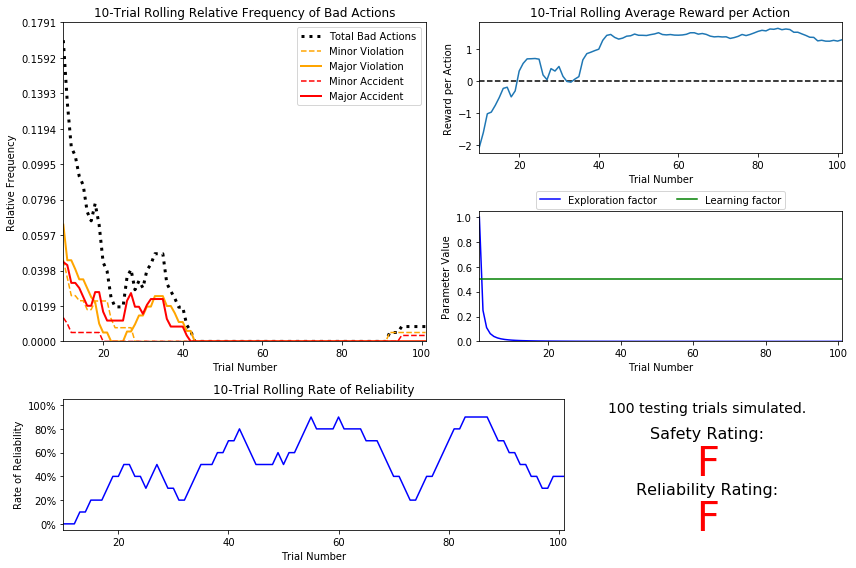

In [18]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("epsilon = 1/t**2, alpha=0.5, tolerance=0.0001")
vs.plot_trials('sim_improved-learning.csv')


epsilon = 1.0/(t**2+at), alpha=0.5, tolerance=0.0001


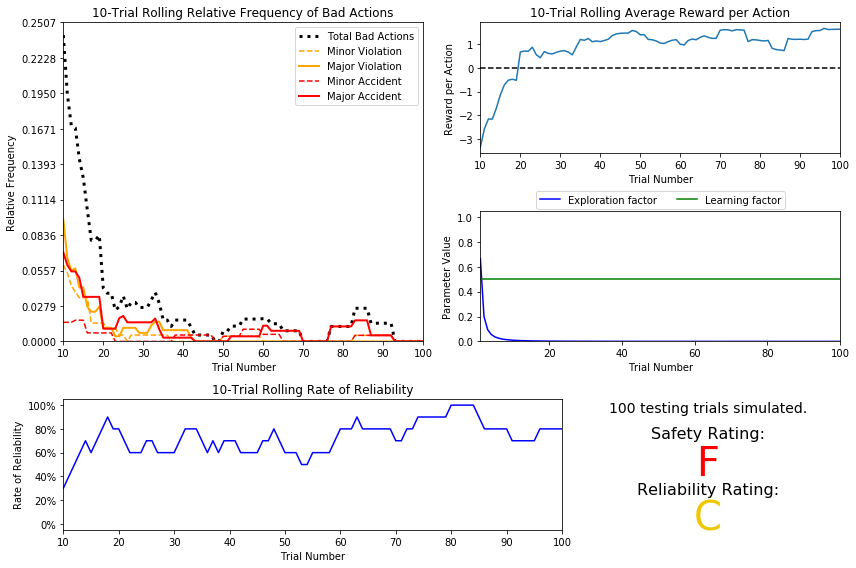

In [19]:
print("epsilon = 1.0/(t**2+at), alpha=0.5, tolerance=0.0001")
vs.plot_trials('sim_improved-learning.csv')

epsilon = 1.0/(t**2-at), alpha=0.5, tolerance=0.0001


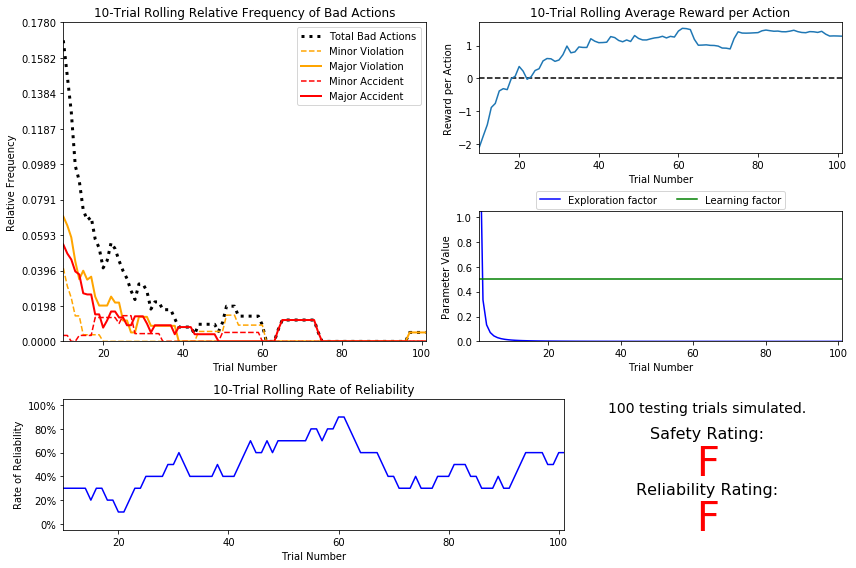

In [20]:
print("epsilon = 1.0/(t**2-at), alpha=0.5, tolerance=0.0001")
vs.plot_trials('sim_improved-learning.csv')

epsilon = ASB(COS(at)), alpha=0.5, tolerance=0.05


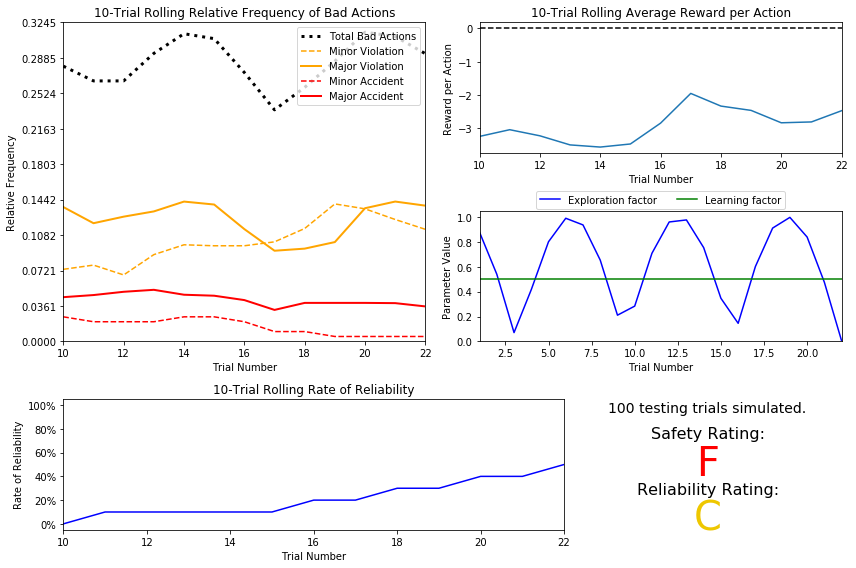

In [17]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("epsilon = ASB(COS(at)), alpha=0.5, tolerance=0.05")
vs.plot_trials('sim_improved-learning.csv')


epsilon = 1.0/(t**2), alpha=0.95, tolerance=0.0001


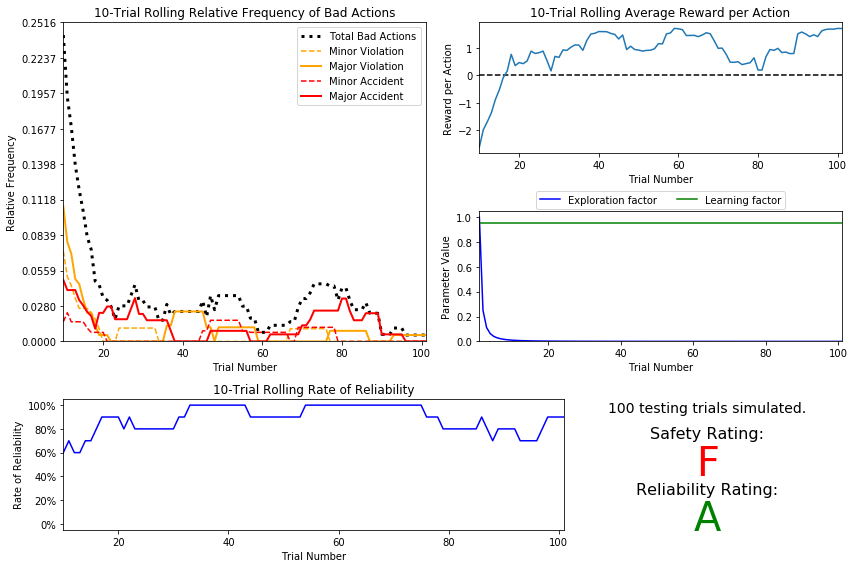

In [22]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("epsilon = 1.0/(t**2), alpha=0.95, tolerance=0.0001")
vs.plot_trials('sim_improved-learning.csv')

epsilon = 1.0/(t**2), alpha=0.95, tolerance=0.0005


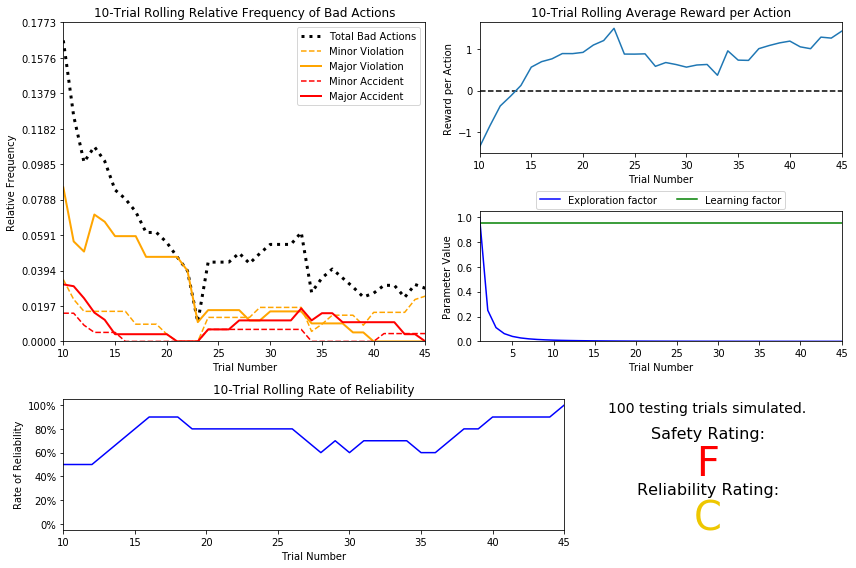

In [23]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("epsilon = 1.0/(t**2), alpha=0.95, tolerance=0.0005")
vs.plot_trials('sim_improved-learning.csv')

epsilon = ASB(COS(at)), alpha=0.01, tolerance=0.001


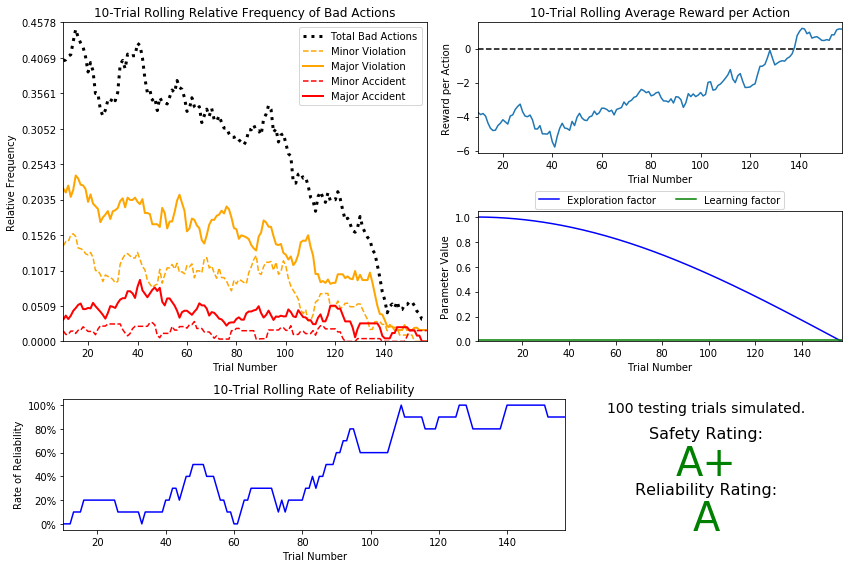

In [21]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("epsilon = ASB(COS(at)), alpha=0.01, tolerance=0.001")
vs.plot_trials('sim_improved-learning.csv')

epsilon = 1.0/(e**-at), alpha=0.01, tolerance=0.001


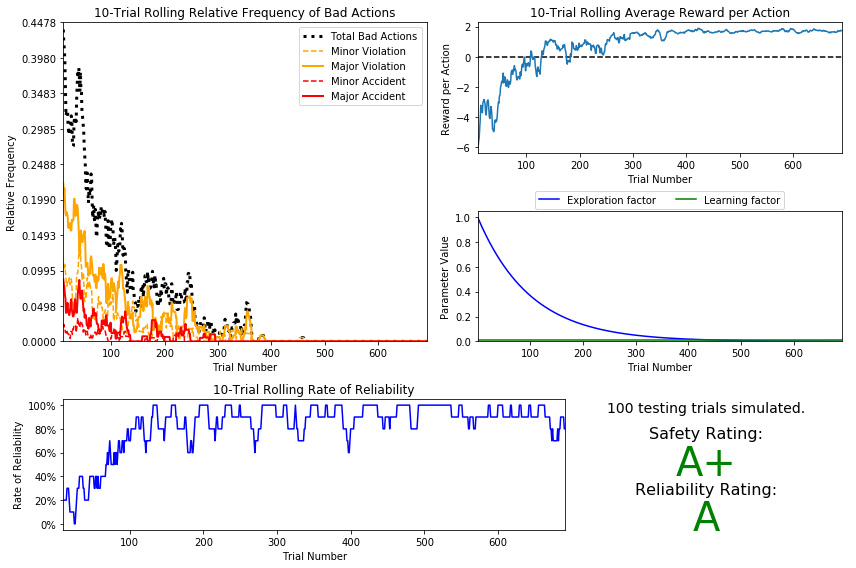

In [28]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("epsilon = 1.0/(e**-at), alpha=0.01, tolerance=0.001")
vs.plot_trials('sim_improved-learning.csv')

epsilon = a**t, alpha=0.96, tolerance=0.005


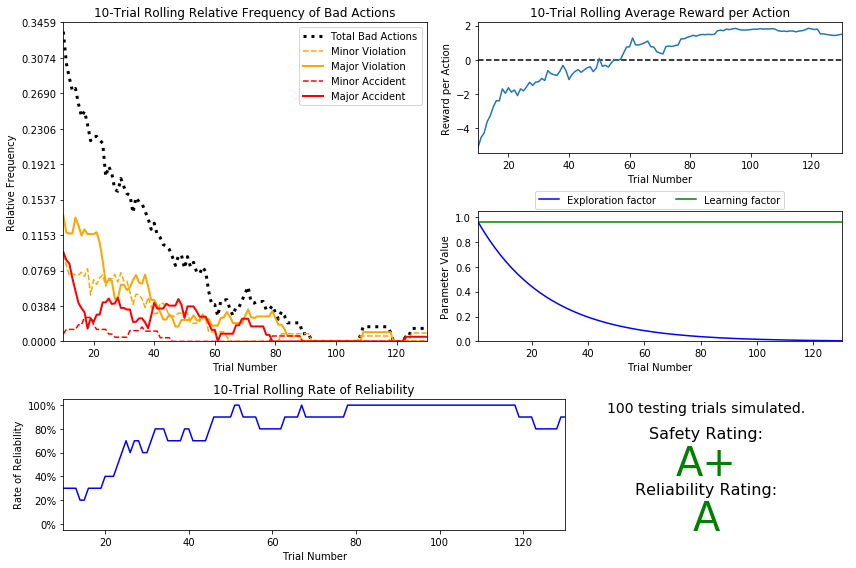

In [27]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("epsilon = a**t, alpha=0.96, tolerance=0.005")
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
      
 
| Attempt |  Epsilon - the exploration factor | Alpha | Tolerance | Safety | Reliability | n_test |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 | $\epsilon$=${1}/{t^2}$ | 0.5 | 0.0001 | F | F | 100 |
| 2 | $\epsilon$=${1}/{(t^2 + at)}$ | 0.5 | 0.0001 |F | C | 100 |
| 3 | $\epsilon$=${1}/{(t^2 - at)}$ | 0.5 | 0.0001 | F | F | 100 |
| 4 | $\epsilon$=$ABS(COS(at))$ | 0.5 | 0.05 | F | C | 100 |
| 5 | $\epsilon$=${1}/{t^2}$ | 0.95 | 0.0001 | F | A | 100 |
| 6 | $\epsilon$=${1}/{t^2}$ | 0.95 | 0.0005 | F | C | 100 |
| 7 | ** Top3 **$\epsilon$=${ABS(COS(at))}$ | 0.01 | 0.001 | A+ | A | 100 |
| 8 | ** Top3 **$\epsilon$=${e^{at}}$ | 0.01 | 0.001 | A+ | A | 100 |
| 9 | ** Top3 **$\epsilon$=${a^t}$ | 0.96 | 0.005 | A+ | A | 100 |


 - I used 3 decaying functions as my Top 3 epsilons. One of them is *cosine* and the other two are *exponential*. In all of these 3 cases, there was a **remarkable improvement** in both Safety and Reliability. The number of bad decisions taken went down from **41%** to **1%** with the number of major and minor accidents and major and minor traffic violations reaching towards zero with the increase in the trial number.The reliability also went up from **10% to almost 90%**.
 
 
 - For the cosine function the agent required around **150 trials** before beginning testing. For the **exponential decay functions**, the trial numbers were approximately **650 and 130** respectively. So we see the 2nd exponential function i.e. a**t required the least numbers of trials before the testing began.
 
 
 - For the *most optimized exponential function*, I used an **epsilon tolerance of 0.005 and alpha (learning rate) of 0.96**. I used a *high learning rate* value because of the **gradual decay rate** as shown in the curve with the curve being long tailed. So this long decay time gave the agent enough time for exploration before it started exploitation. The long tail to epsilon tolerance was so that it can learn all of the safety rules in the 96 possible state combinations that I outlined in answer to Question 5.
 
 
 - Compared to the default Q-learner in the previous section which followed a linear decay equation for the exploration factor(epsilon), here we are seeing a huge improvement in the Smartcab driving agent both in terms of Safety and Reliablity which reached a grade of **A+ and A** respectively and which were **F and B** respectively in the *previous section*. The reliability increased from **70% ** in the previous section to a value **greater than 90%**. Also, for the safety factors, the **total percentage of bad decisions** which was in the range **18% - 32%** in the previous section decreased finally to around **1%** resulting in a big improvement of both **traffic violations and accidents**.
 
 
 - The safety and reliability rating are now **A+ and A** with the optimized Q-Learning agent. This again is much superior to the *default Q-Learning agent and the basic driving agents* where the ratings were F and B respectively. Since the Q-Learner's results are A+ for Safety and A for Reliability, I would say that it seems to have learn the appropriate policy.
 
 
 - As we are talking about self driving cars here where human lives will be at stake, I am satisfied with my safety grading as that is the topmost priority and I have managed to achieve the highest ranking for that **(A+)**. For reliability, that is whether or not the Smartcab is reaching the destination in time, even though I have achieved a high rank of **'A'** which is the 2nd highest rank, I am still not fully satisfied as there's still room for improvement.
 
 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, we can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, we can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** our driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

** 1. The 4 features we chose initially were **

 - **Waypoint**: Which is the direction the Smartcab should drive leading to the destination, relative to the Smartcab's heading.
 
 - **Light**: Whether the signal is red or green.
 
 - **Left**: Whether there are vehicles on the left traffic of the Smartcab
 
 - **Oncoming**: the intended direction of travel for a vehicle across the intersection from the Smartcab. Returns None if no vehicle is present.
 
Based on the following features, the example of optimal policy would be the actions taken by the Smartcab on a red light given that there are no oncoming traffic. So there are 4 possibilities: **None, Right, Left and Forward**. The *optimal policy* here would be **None**. Both Left and Forward violates the US traffic rules. hence those two would be *incorrect actions*. Taking **right** is legal according to the US laws on a red signal. So that should be the *Suboptimal policy*.

** 2. This is one of the policies I found in the 'sim_improved-learning.txt': **

**forward_red_None_None**

 -- forward : -9.05
 
 -- right : 0.23
 
 -- None : 2.48
 
 -- left : -9.45
 
So we see the policies here are getting correctly rewarded due to **reinforcement learning**. The action 'None' receives the highest reward as it is the *optimal policy*. The 'Right' being the *suboptimal policy* also receives a positive reward but less than the optimal one. But as both *'left' and 'forward'* will be a **violation to the traffic law and can cause a major accident**, they are penalized heavily with **negative rewards**. So this is either converging to or has already converged to the **optimal policy**.

Upon investigating the policies in the text file, I found that majority of the policies are correct for the given state. But there are also some scenarios where the policy is different than what would be expected from an optimal policy.


** 3. Examples of Optimal policies from Q-table: **

Here's another example of an optimum policy which my Smartcab learnt due to reinforcement learning:

**left_red_None_forward**

 -- forward : -9.98
 
 -- right : -0.49
 
 -- None : 2.78
 
 -- left : -9.12
 
Here the situation is the Smartcab should **turn left** to go to its *destination(waypoint)*. The *signal is red* at the moment(light). There are *no traffic from the left(left)* and the *intended direction of travel for a vehicle across the intersection from the Smartcab is Forward(oncoming)*. So we see that for the Smartcab, going Forward or Left while the signal is red can cause a **major accident** and for that those two actions are penalized heavily. Doing nothing (None) or idling is the *ideal condition* here for optimal policy and hence it is rewarded the maximum points. Even though turning right was the suboptimal policy in the last example, here we see it is being penalized. This is because for reaching the destination, the Smartcab has to turn left and so taking a *right is not the correct action here*.

** 4. Scenario where the Smartcab didn't learn the optimum policy: **

In the sim_improved-learning.txt, I found the following entry:

right_green_forward_forward

 -- forward : 1.74
 
 -- right : 0.00
 
 -- None : 0.00
 
 -- left : 0.00

This is a perfect example of a scenario where my *Smartcab did not learn the optimum policy*. Here we see, even though the waypoint is to the right and the Smartcab should go right, but still, it is being rewarded a **greater point** for going forward. So in this scenario, our Smartcab, instead of going right will go forward as that has the **highest Q-value**. I would imagine, this was not one of the scenarios our Smartcab *faced during the trials* because if it would have faced this scenario, it would have seen that going forward is a bad action followed by negative rewards. Thus it may have failed some scenarios past 100 trials. This is why in this situation, our Smartcab *did not learn the optimal policy* as it has failed to search the full **Q-learning feature space**.



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

In my opinion, one of the characteristics about this project which invalidates the use of future rewards in the Q-learning algorithm is absence of a latitude-longitude or a X-Y coordinate system for the Smartcab. Here all the reinforcement learning is done based on the states of the Smartcab on a grid world of intersections only based on the actions it takes. So that means here the Smartcab can only move towards the specified destination with the help of the waypoints it is given at a particular state in the grid world. It has no knowledge of the destination as a X-Y coordinate from its current location also as a X-Y coordinate as this information is not provided in the Q-table. So that's why we cannot allot any future rewards to the agent here which might affect its actions.

The 2nd characteristics which follows the same pattern in invalidating the use of future rewards is the dynamically changing destination goals which is a part of the environment in this grid world. So this may not be a good way of calculating the future rewards and can actually make the agent unlearn many of its optimal policies. Let's discuss this briefly. If we assign future rewards based on destination, then this will become a location based policy and not a traffic rule based policy. So updating the Q-value at time t by including future rewards will actually adversely affect its traffic rule based policies as then the negative rewards generated by breaking the traffic rules would be much smaller than the accumulating rewards in the future for meeting the goals. So this is one more reason why we have invalidated the discount factor or the 'gamma' in this particular Q-learning algorithm.